In [1]:
import datetime
L=[]

for i in range(20):
    start = datetime.datetime(int(str(2008))+int(i/12),1+(i%12),1)
    L.append(start.strftime('%Y%m%d'))

In [2]:
import requests as req
import pandas as pd
import io
import time

dictionary = {}

for i in L:

    try:
        URV = 'https://www.twse.com.tw/indicesReport/MI_5MINS_HIST?response=csv&date='+i
        time.sleep(5)

        s = req.get(URV)
        data = pd.read_csv(io.StringIO(s.text[24:]))
        data = data.iloc[:,:-1]
        dictionary.update({i:data})
    except:
        print(i)

result = pd.concat([items[1].iloc[1:] for items in dictionary.items()])
result.columns = dictionary[L[0]].columns
result.index = result['日期']

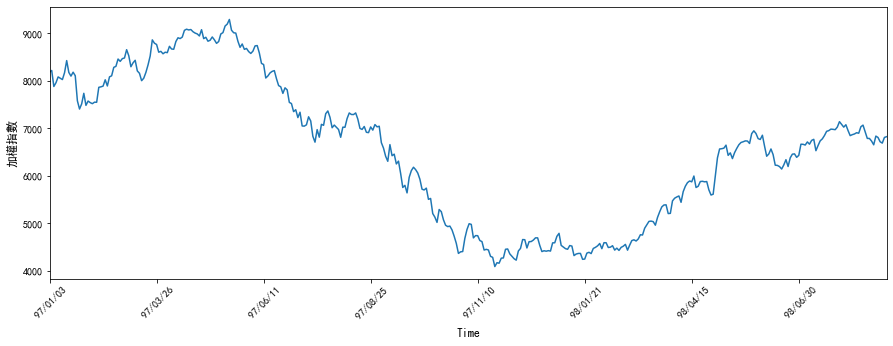

In [10]:
import matplotlib.pyplot as plt
# font = {'family' : 'STFangsong',
# 'weight' : 'bold',
# 'size'  : '16'}
plt.rcParams['font.sans-serif'] = ['SimHei']

s = [result['收盤指數'].iloc[i].split(',')[0]+result['收盤指數'].iloc[i].split(',')[1] for i in range(len(result))]
result2 = pd.DataFrame({'收盤指數':s},index = result['日期'])
result2 = pd.to_numeric(result2['收盤指數'])
ax = result2.plot(figsize=(15,5))
ax.set_ylabel('加權指數',fontdict={'fontsize':12})
ax.set_xlabel('Time',fontdict={'fontsize':12})
p=ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.rc('font', **font)

In [11]:
result2.max()-result2.min()

5205.27

In [34]:
import matplotlib
print(matplotlib.__file__)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\__init__.py
